In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('dataset/fb_transfers.csv') as csvfile:
    totalCount = 0
    headerRow = []
    componentRows = []
    readCSV = csv.reader(csvfile, delimiter=',')
    myPlayerDict = {}
    for row in readCSV:
        myTempRow = []
        if totalCount==0:
            for column in row:
                headerRow.append(column)
        else:
            for column in row:
                myTempRow.append(column)
            componentRows.append(myTempRow)
        totalCount += 1

## Testing total count and data captured

In [3]:
headerRow[0] = 'PLAYER'
index = 0
for element in headerRow:
    headerRow[index] = (element.strip()).upper()
    index += 1

In [4]:
finalData = []
for row in componentRows:
    index = 0
    saleDict = {}
    for element in headerRow:
        saleDict[element] = row[index].upper()
        index += 1
    finalData.append(saleDict)

In [5]:
def filterTransactions(dataPassed, transaction):
    salesOnly = []
    for row in dataPassed:
        if row['PRICE DESCRIPTION']==transaction:
            salesOnly.append(row)
    return salesOnly

## Filtered Sale Data is now availible

In [6]:
sales = filterTransactions(finalData, 'SOLD')
loans = filterTransactions(finalData, 'LOAN')
frees = filterTransactions(finalData, 'FREE')
undisclosed = filterTransactions(finalData, 'UNDISCLOSED')

Text(0.5, 1.0, 'Total Player Transfers: 2017 - 2018')

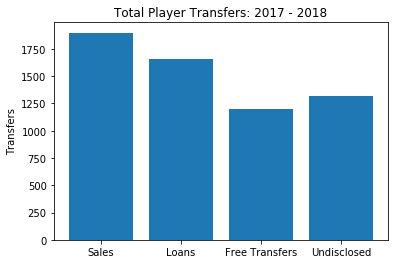

In [7]:
objects = ('Sales', 'Loans', 'Free Transfers', 'Undisclosed')
y_pos = np.arange(len(objects))
transactions = [len(sales), len(loans), len(frees), len(undisclosed)]
 
plt.bar(y_pos, transactions, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Transfers')
plt.title('Total Player Transfers: 2017 - 2018')

## Get data of top clubs from 12 leagues, and return the same as a dict

In [8]:
def fetchKey():
    path = './dataset/myAPIKey.txt'
    apikey_file = open(path,'r')
    return apikey_file.read()

In [9]:
import http.client
import json
def fetchTeamData():
    myDataDict = {}
    try:
        myDataDict = np.load('my_file.npy').item()
    except:
        connection = http.client.HTTPConnection('api.football-data.org')
        myAPIKey = fetchKey()
        headers = { 'X-Auth-Token': myAPIKey }
        counter = 0
        masterTeamSet = {}
        wantedCompetitions = [2021, 2014, 2015, 2002, 2017, 2145, 2001, 2019, 2003]
        competitionTitles = ["EPL", "LaLiga", "Ligue1", "Bundesliga", "Primera_Liga", "MLS", "UCL", "Serie_A", "Eredivisie"]
        for competition in wantedCompetitions:
            connection.request('GET', '/v2/{myID}/competition}/teams'.format(myID=competition), None, headers )
            response = json.loads(connection.getresponse().read().decode())
            masterTeamSet[competitionTitles[counter]] = response
        path = './dataset/myMasterFile.npy'
        np.save(path, masterTeamSet)
        return masterTeamSet
    else:
        return myDataDict

## Use team data to try and rate inflation constants for the buyers and sellers